In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm, colors
import glob

from numba import njit, vectorize, float32

from typing import Callable, Optional, Union

import hoomd
import gsd.hoomd
import freud

import sys
import time
import pickle
import gc
import warnings
import copy
import pathlib

import os
import sys

import signac

from dataclasses import dataclass
from dataclasses_json import dataclass_json

In [2]:
from monk import nb, prep, pair, render, utils, workflow, methods, grid
render.preview_tracer.resize(800, 800)

config = workflow.get_config()

In [3]:
project: signac.Project = signac.get_project(root=config['root'])

In [41]:
cut = 5.0
files = glob.glob(f'virials_index-*_rcut-{cut:.1f}.npy')
virials = np.load(files[8])
angles = np.linspace(0, 175, 36)

Text(0.5, 1.0, 'r_free = 5.0')

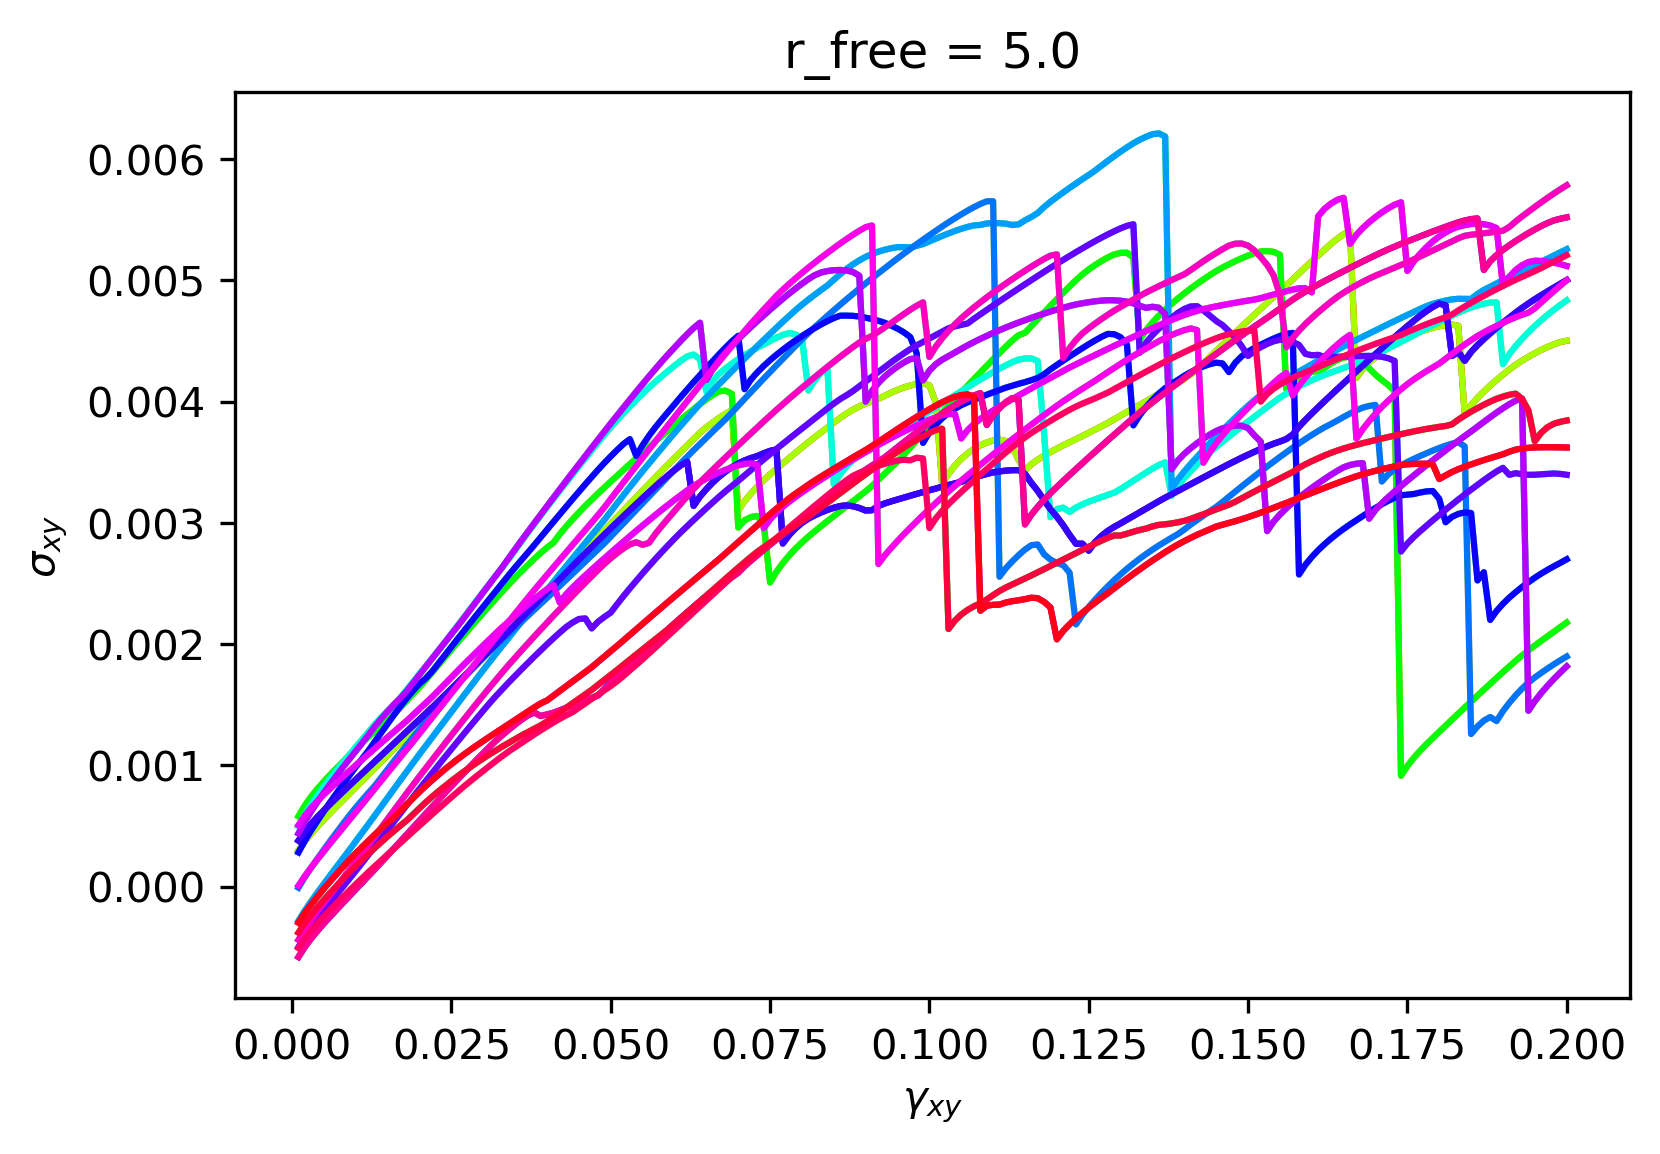

In [37]:
cmap = cm.hsv
norm = mpl.colors.Normalize(vmin=0, vmax=35)

plt.figure(dpi=150)

strain = np.linspace(0.001, 0.2, 200)

for i in range(len(angles)):
    plt.plot(strain, -virials[i,1:,1], color=cmap(norm(i)));
plt.ylabel(r'$\sigma_{xy}$')
plt.xlabel(r'$\gamma_{xy}$')
plt.title(f'r_free = {cut:.1f}')

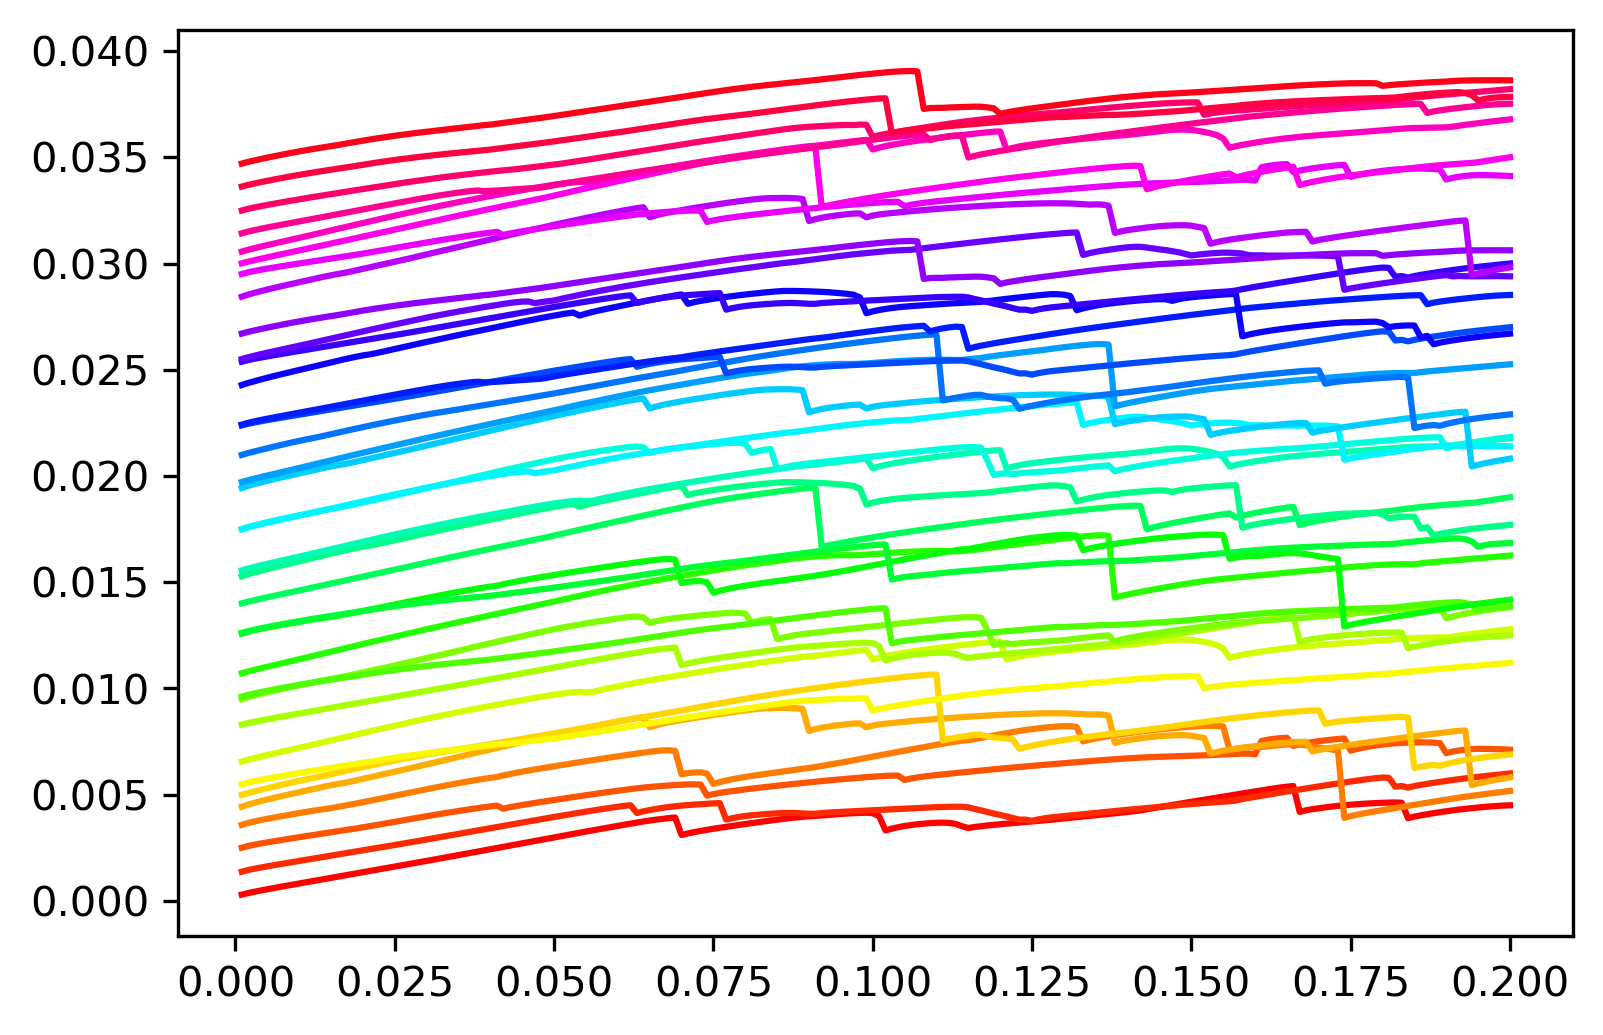

In [38]:
cmap = cm.hsv
norm = mpl.colors.Normalize(vmin=0, vmax=35)

plt.figure(dpi=150)

strain = np.linspace(0.001, 0.2, 200)

for i in range(len(angles)):
    plt.plot(strain, -virials[i,1:,1] + i*0.001, color=cmap(norm(i)));

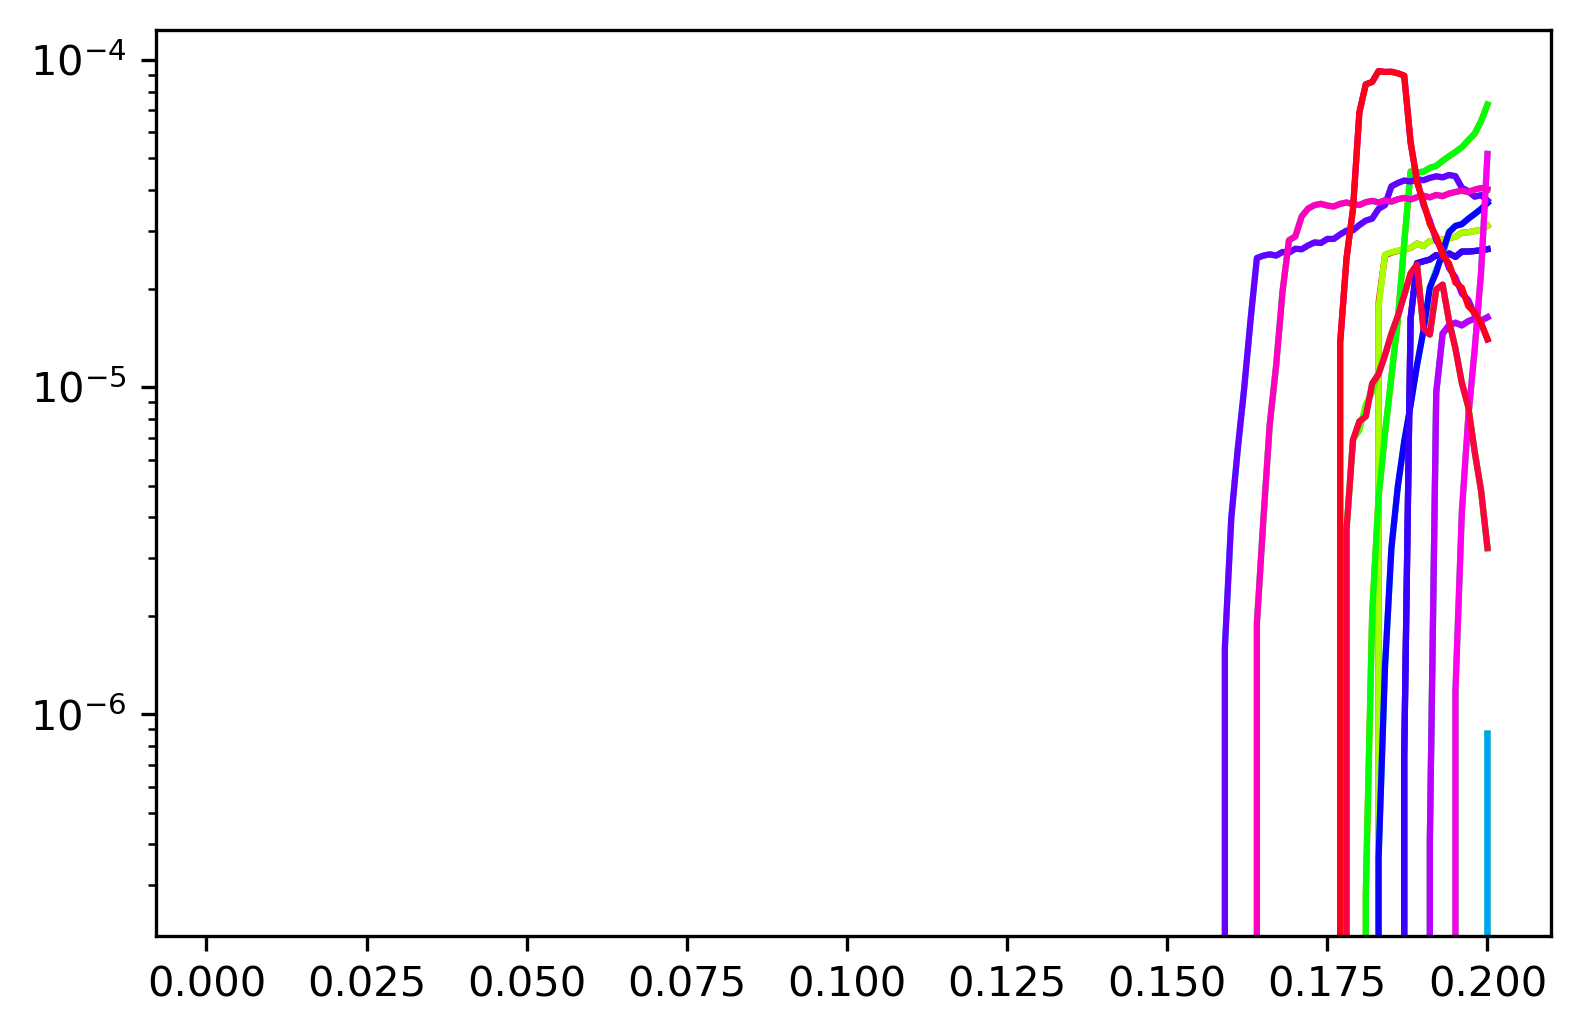

In [35]:
cmap = cm.hsv
norm = mpl.colors.Normalize(vmin=0, vmax=35)

plt.figure(dpi=150)

strain = np.linspace(0.002, 0.2, 199)

for i in range(len(angles)):
    plt.plot(strain, np.diff(virials[i,1:,1], axis=0), color=cmap(norm(i)));
plt.yscale('log')
# plt.ylim(1e-9, 1e-2)

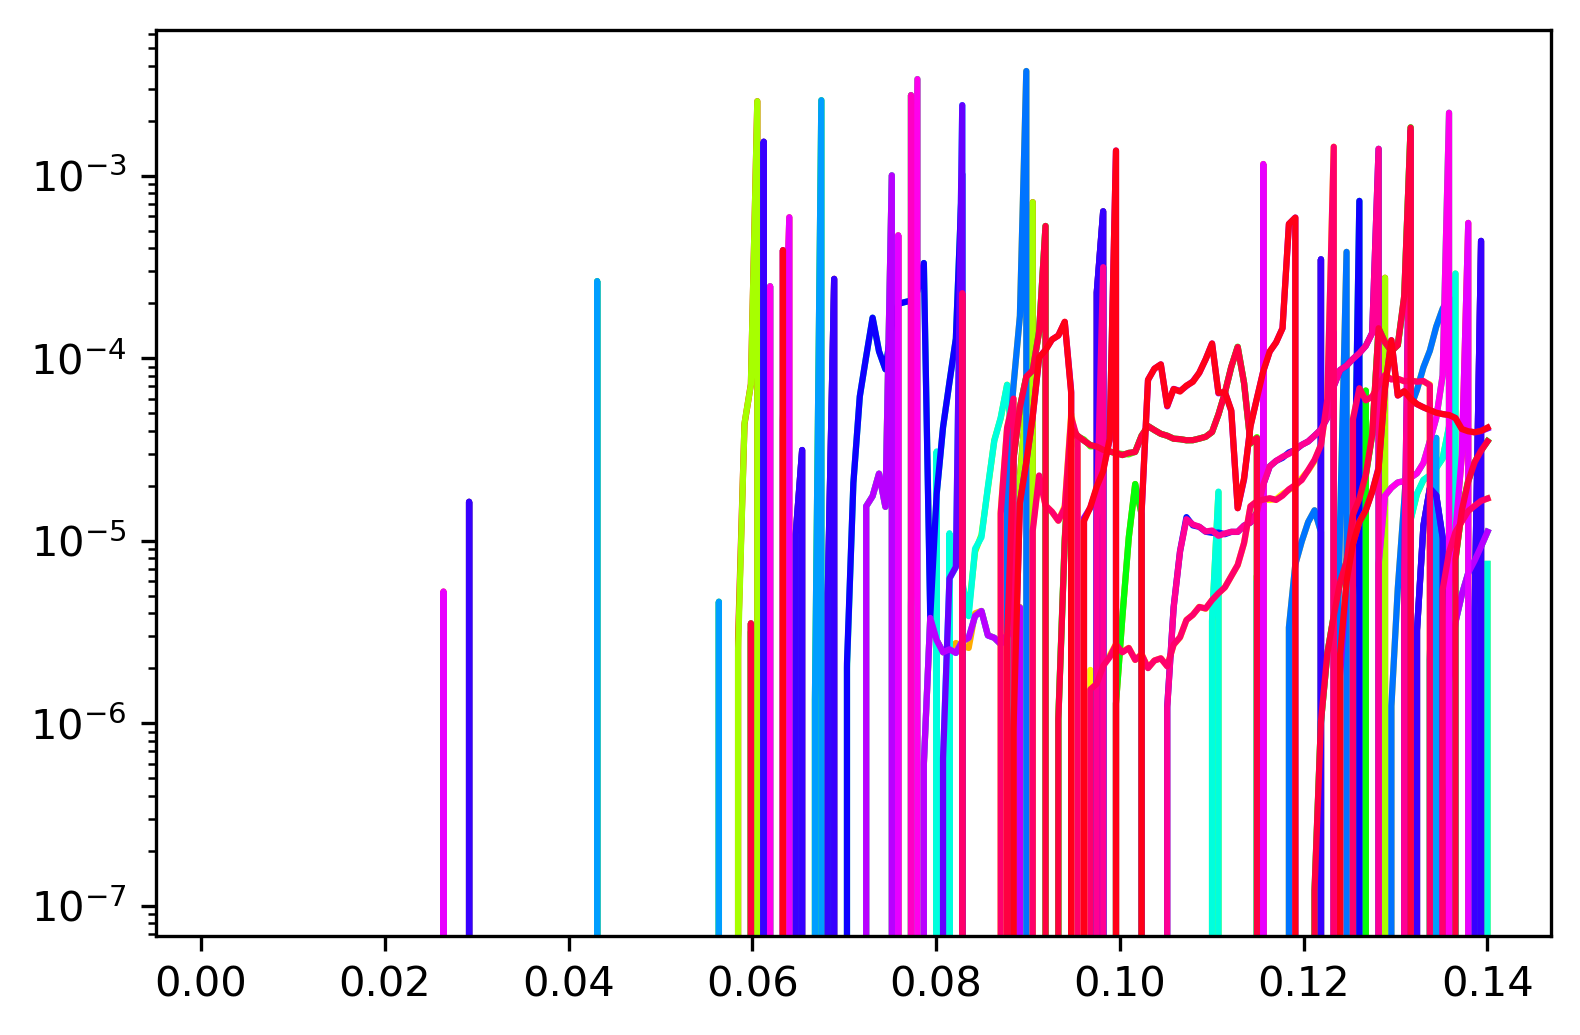

In [201]:
cmap = cm.hsv
norm = mpl.colors.Normalize(vmin=0, vmax=35)

plt.figure(dpi=150)

strain = np.linspace(0.002, 0.2, 199)

for i in range(len(angles)):
    plt.plot(strain, np.diff(virials[i,1:,1], axis=0), color=cmap(norm(i)));
plt.yscale('log')
# plt.ylim(1e-9, 1e-2)

In [ ]:
cmap = cm.hsv
norm = mpl.colors.Normalize(vmin=0, vmax=35)

strain = np.linspace(0.002, 0.2, 199)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, dpi=150)

for i in range(len(angles)):
    cond = np.diff(virials[i,1:,1], axis=0) > 1e-3
    y = strain[cond]
    plt.plot(i/36*np.pi*np.ones_like(y), y, ".", color=cmap(norm(i)));
    plt.plot((i+36)/36*np.pi*np.ones_like(y), y, ".", color=cmap(norm(i)));
# plt.yscale('log')
# plt.ylim(1e-9, 1e-2)

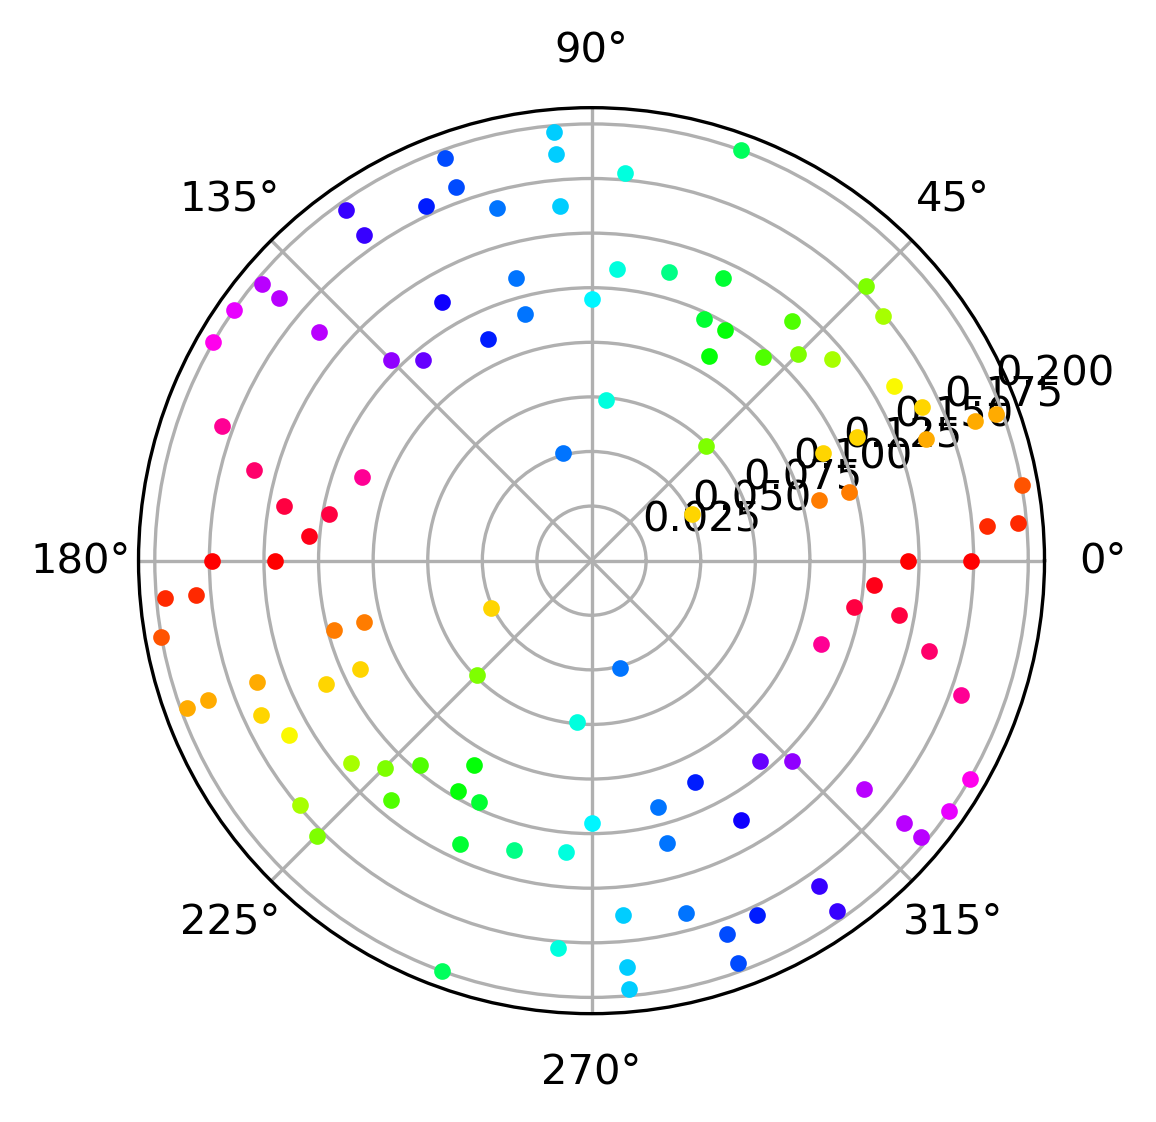

In [42]:
cmap = cm.hsv
norm = mpl.colors.Normalize(vmin=0, vmax=35)

strain = np.linspace(0.002, 0.2, 199)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, dpi=150)

for i in range(len(angles)):
    cond = np.diff(virials[i,1:,1], axis=0) > 1e-3
    y = strain[cond]
    plt.plot(i/36*np.pi*np.ones_like(y), y, ".", color=cmap(norm(i)));
    plt.plot((i+36)/36*np.pi*np.ones_like(y), y, ".", color=cmap(norm(i)));
# plt.yscale('log')
# plt.ylim(1e-9, 1e-2)

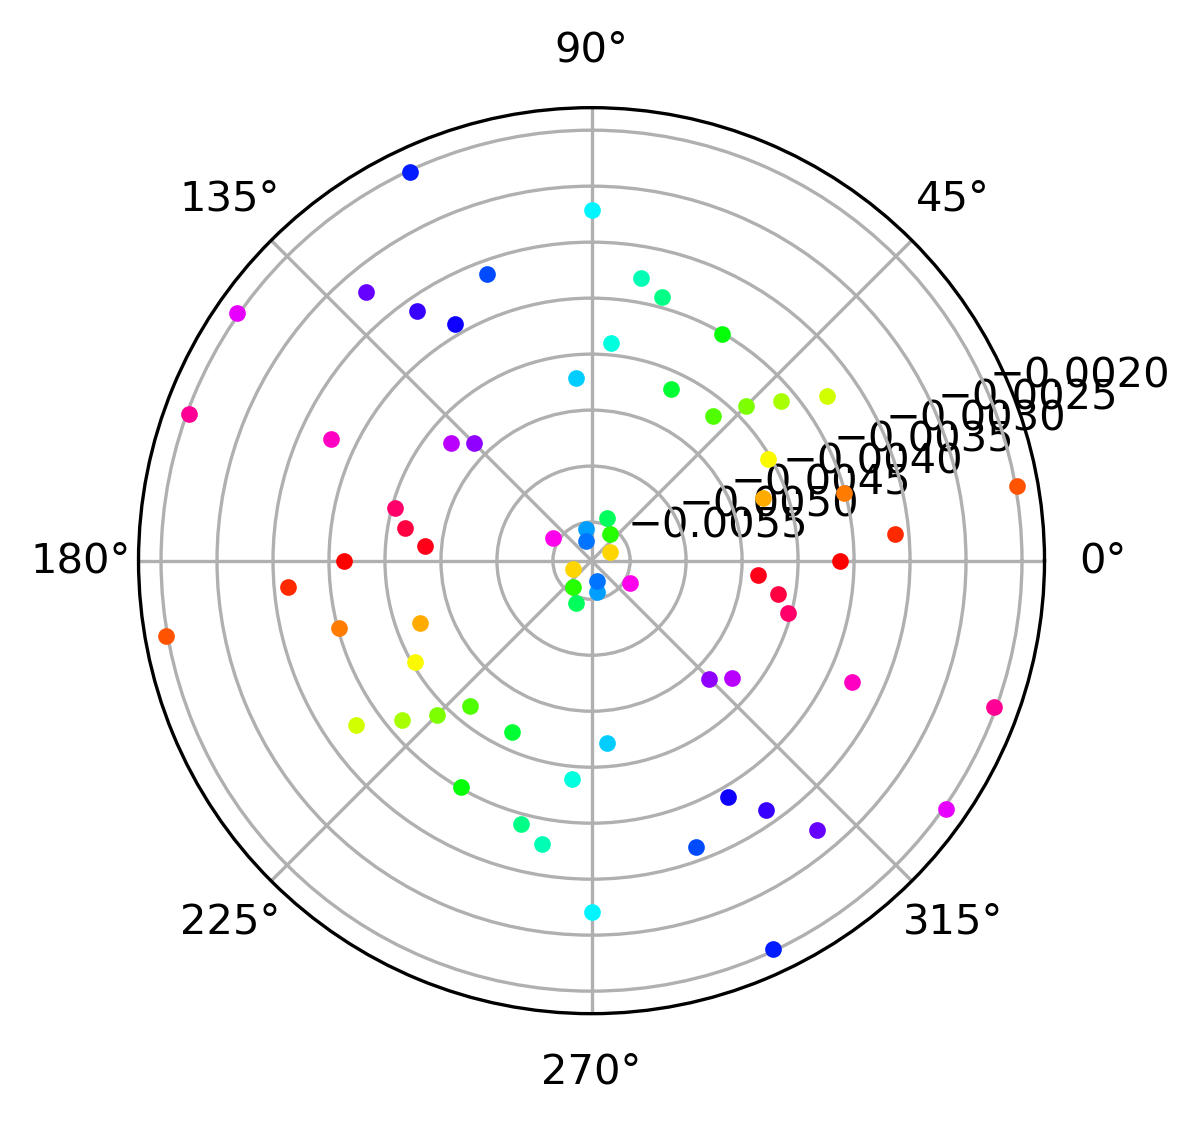

In [40]:
cmap = cm.hsv
norm = mpl.colors.Normalize(vmin=0, vmax=35)

strain = np.linspace(0.002, 0.2, 199)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, dpi=150)

for i in range(len(angles)):
    cond = np.diff(virials[i,1:,1], axis=0) > 0.0
    y = (virials[i,1:-1,1]- virials[i,0,1])[cond][[0]]
    plt.plot(i/36*np.pi*np.ones_like(y), y, ".", color=cmap(norm(i)));
    plt.plot((i+36)/36*np.pi*np.ones_like(y), y, ".", color=cmap(norm(i)));
# plt.yscale('log')
# plt.ylim(1e-9, 1e-2)

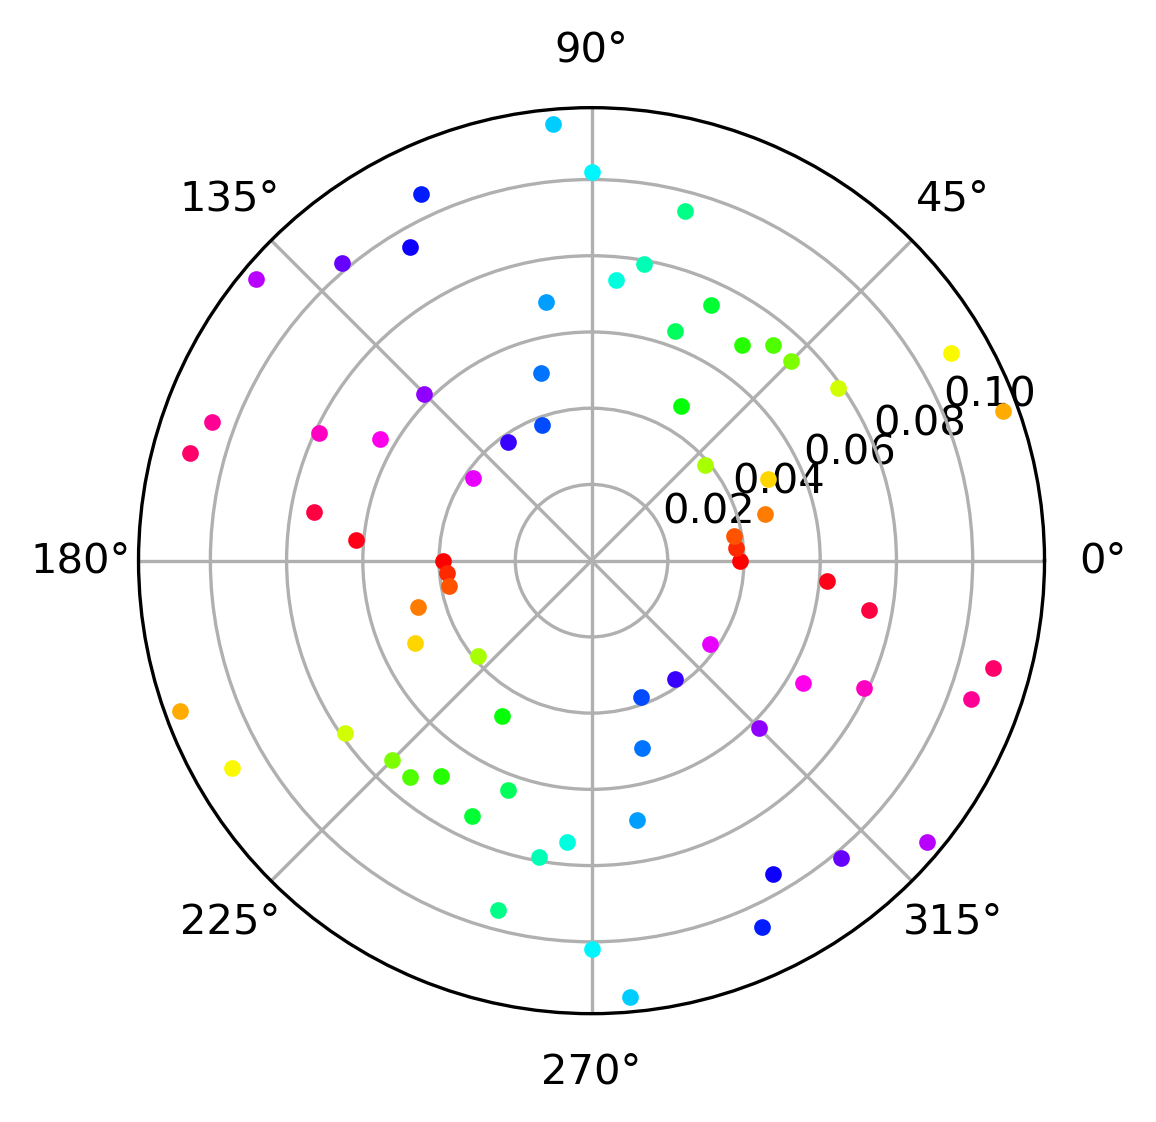

In [44]:
cmap = cm.hsv
norm = mpl.colors.Normalize(vmin=0, vmax=35)

strain = np.linspace(0.002, 0.2, 199)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, dpi=150)

for i in range(len(angles)):
    cond = np.diff(virials[i,1:,1], axis=0) >= 0.0
    y = strain[cond][[0]]
    plt.plot(i/36*np.pi*np.ones_like(y), y, ".", color=cmap(norm(i)));
    plt.plot((i+36)/36*np.pi*np.ones_like(y), y, ".", color=cmap(norm(i)));
# plt.yscale('log')
# plt.ylim(1e-9, 1e-2)

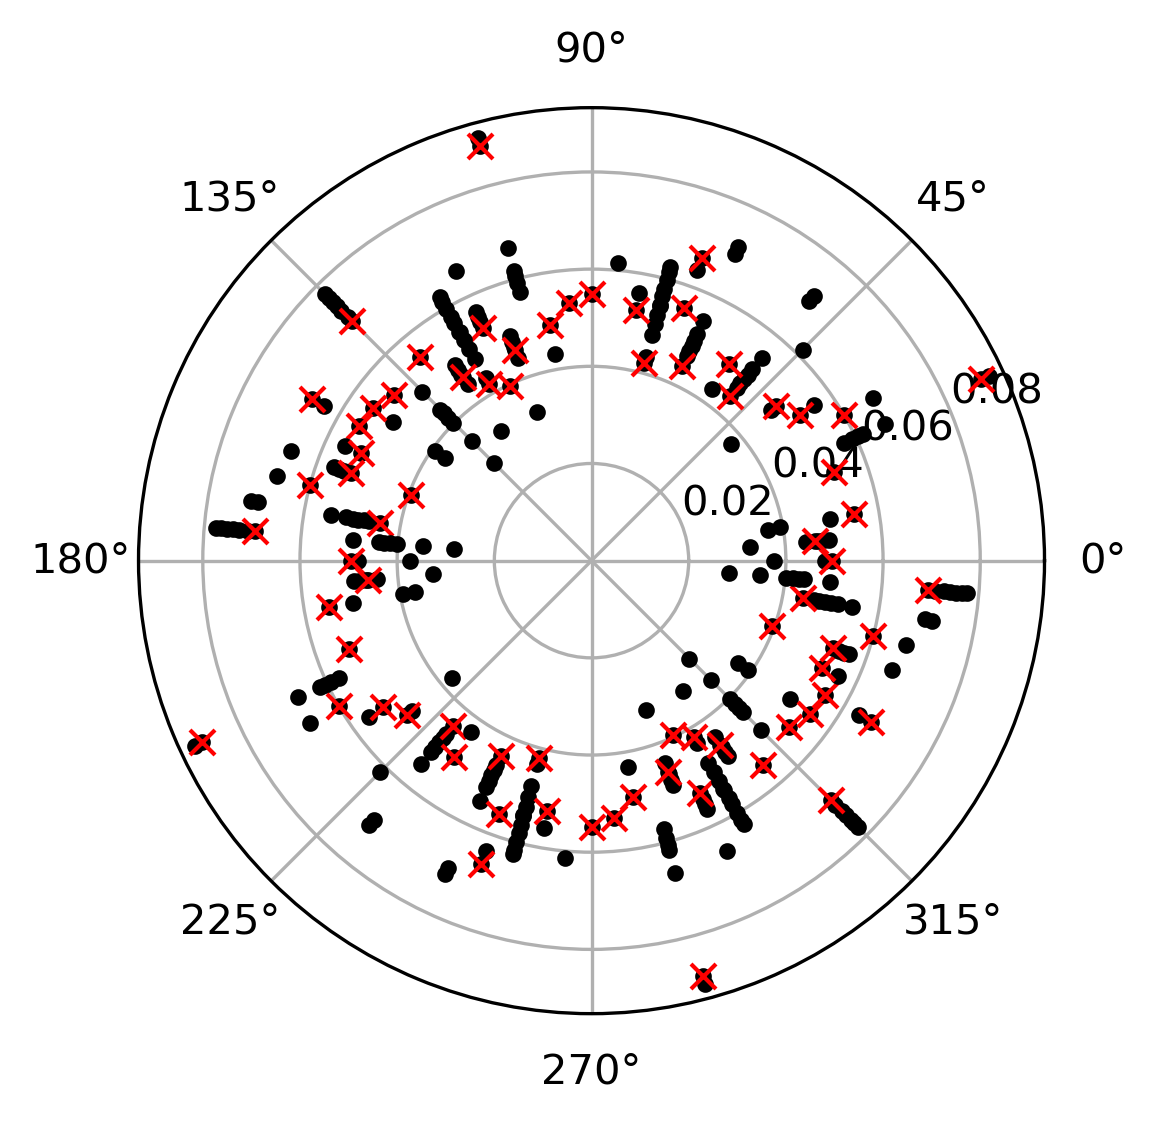

In [215]:
cmap = cm.hsv
norm = mpl.colors.Normalize(vmin=0, vmax=17)

strain = np.linspace(0.002, 0.2, 199)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, dpi=150)

for i in range(len(angles)):
    cond = (np.diff(virials[i,1:,1], axis=0) > 1e-4 ) & (strain > 0.01)
    if not np.any(cond):
        continue
    y = -virials[i,1:-1,1][cond]#[[0]]
    plt.plot(i/36*np.pi*np.ones_like(y), y*10, ".", color="k");
    plt.plot((i+36)/36*np.pi*np.ones_like(y), y*10, ".", color="k");

    cond = (np.diff(virials[i,1:,1], axis=0) > 1e-3 )
    if not np.any(cond):
        continue
    y = -virials[i,1:-1,1][cond]#[[0]]
    plt.plot(i/36*np.pi*np.ones_like(y), y*10, "x", color="r");
    plt.plot((i+36)/36*np.pi*np.ones_like(y), y*10, "x", color="r");
# plt.yscale('log')
# plt.ylim(1e-9, 1e-2)

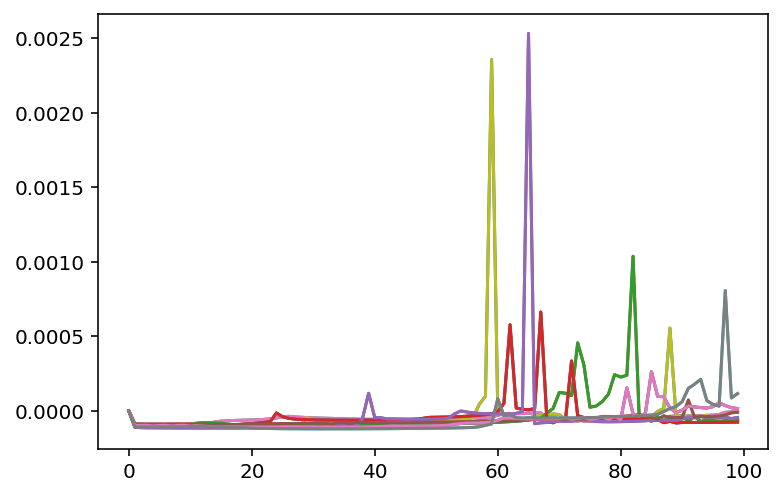

In [146]:
plt.plot(np.diff(virials[:,:,1], axis=1).T);

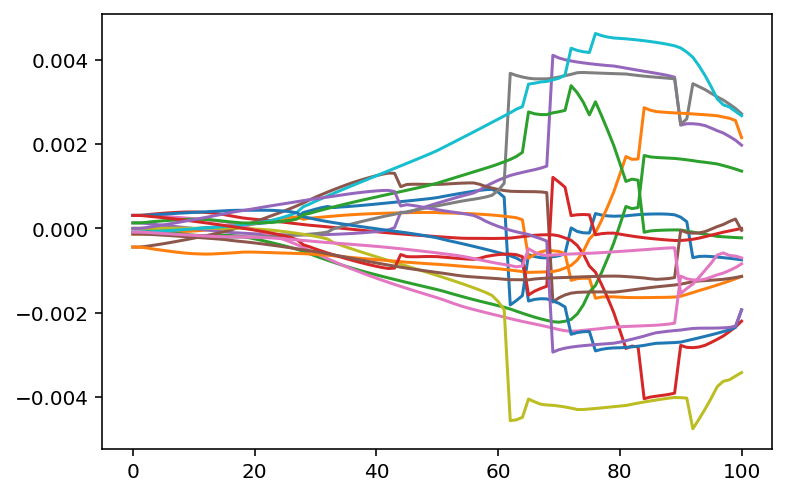

In [132]:
plt.plot(np.diff(virials[:,:,1], axis=0).T)

In [242]:
cut_snap = cut.to_snap(0, 0.0)

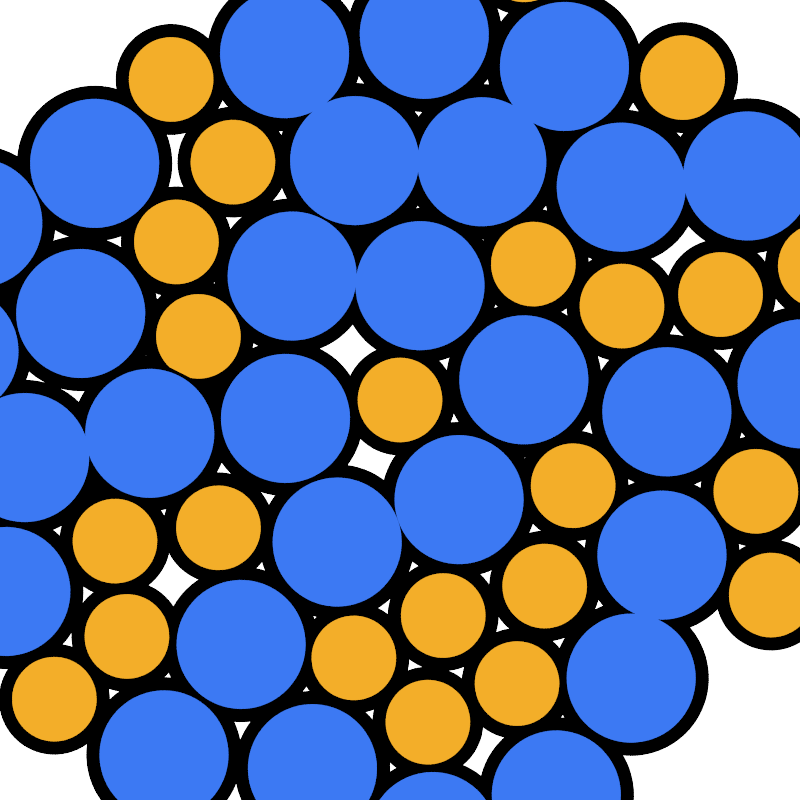

In [243]:
render.render_disk_frame(cut_snap)